In [60]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from datetime import datetime

## Plotting Knock Airport Temperature Data
*****************

In [61]:
#Read in csv file
weather_df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
#View df
weather_df

C:\Users\oconnora\AppData\Local\Temp\ipykernel_13148\3352988637.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246925,30-sep-2024 20:00,0,1.1,0,9.5,0,9.4,9.2,11.7,99,...,2,5,2,340,,,0.0,,0,8
246926,30-sep-2024 21:00,0,0.0,0,8.6,0,8.6,8.6,11.2,100,...,2,5,2,330,,,0.0,,0,8
246927,30-sep-2024 22:00,0,0.1,0,8.5,0,8.4,8.2,10.9,99,...,2,6,2,320,,,0.0,,0,8
246928,30-sep-2024 23:00,0,0.0,0,8.2,0,8.0,7.8,10.6,97,...,2,6,2,330,,,0.0,,0,8


In [62]:
#View the Date column:
weather_df["date"] #data type = object, must be converted to datetime object before plotting

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
246925    30-sep-2024 20:00
246926    30-sep-2024 21:00
246927    30-sep-2024 22:00
246928    30-sep-2024 23:00
246929    01-oct-2024 00:00
Name: date, Length: 246930, dtype: object

In [63]:
#Replace the current date column with the correct datetime type: 
weather_df["date"] = pd.to_datetime(weather_df["date"], format='%d-%b-%Y %H:%M')

In [64]:
#Set the index of this dataframe to the Date for easier manipulation of data
weather_df.set_index("date", inplace=True)
weather_df

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30 20:00:00,0,1.1,0,9.5,0,9.4,9.2,11.7,99,1014.1,2,5,2,340,,,0.0,,0,8
2024-09-30 21:00:00,0,0.0,0,8.6,0,8.6,8.6,11.2,100,1014.7,2,5,2,330,,,0.0,,0,8
2024-09-30 22:00:00,0,0.1,0,8.5,0,8.4,8.2,10.9,99,1015.0,2,6,2,320,,,0.0,,0,8


Text(0.5, 1.0, 'Temperature Data for Knock Airport 1996-2024')

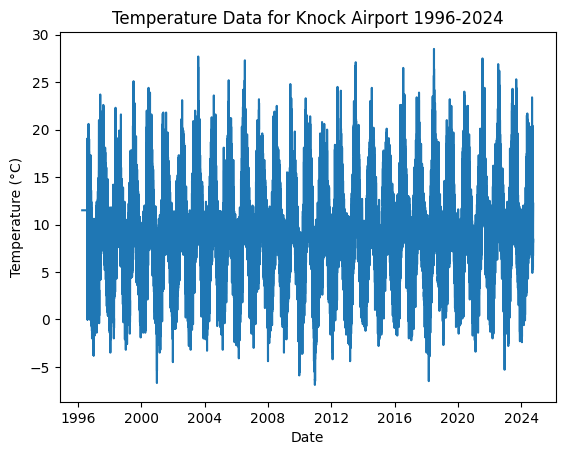

In [65]:
#Plot the temperature data over time: 
ax=sns.lineplot(
    weather_df["temp"]
)
ax.set_ylabel("Temperature (°C)")
ax.set_xlabel("Date")
ax.set_title("Temperature Data for Knock Airport 1996-2024")

Text(0.5, 1.0, 'Mean Temperature at Knock Airport by Year, 1996-2024')

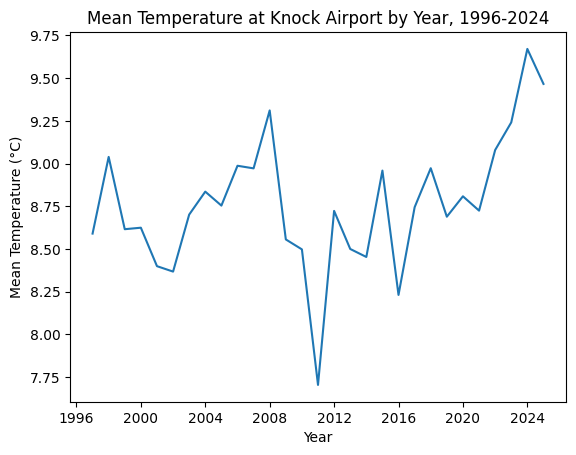

In [66]:
#Plotting the mean temperature by year 
ax = sns.lineplot(
    weather_df["temp"].T.resample("1YE").mean()
)
ax.set_ylabel("Mean Temperature (°C)")
ax.set_xlabel("Year")
ax.set_title("Mean Temperature at Knock Airport by Year, 1996-2024")

Text(0.5, 1.0, 'Mean Temperature at Knock Airport by Month, 1996-2024')

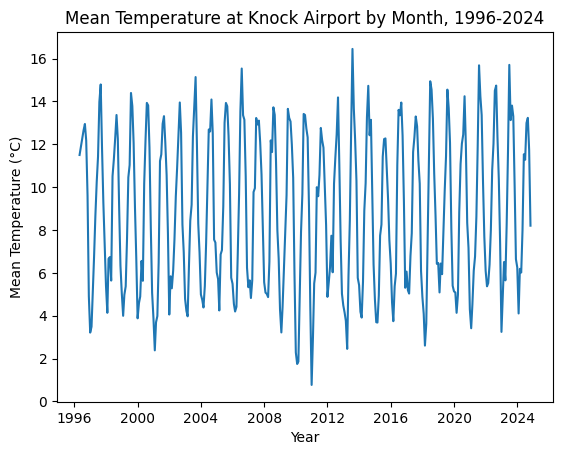

In [67]:
#Plotting the mean temperature by month 
ax = sns.lineplot(
    weather_df["temp"].T.resample("ME").mean().dropna()
)
ax.set_ylabel("Mean Temperature (°C)")
ax.set_xlabel("Year")
ax.set_title("Mean Temperature at Knock Airport by Month, 1996-2024")

## Windspeed Data 
*****************

In [68]:
#Checking windspeed column for empty rows 
weather_df["wdsp"].isnull().sum()

0

In [69]:
#Checking windspeed column for empty rows
(weather_df["wdsp"]== " ").sum()

50

In [70]:
weather_df["wdsp"] = pd.to_numeric(weather_df["wdsp"], errors="coerce")
weather_df["wdsp"].isnull().sum()

50

Text(0.5, 1.0, 'Windspeed Data for Knock Airport 1996-2024')

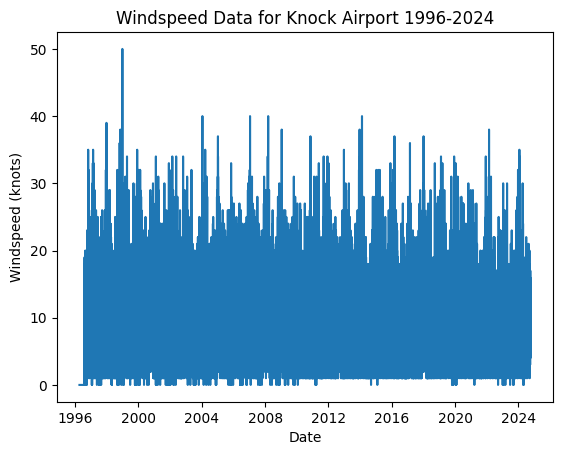

In [71]:
#Plot the windspeed: 
ax=sns.lineplot(
    weather_df["wdsp"]
)
ax.set_ylabel("Windspeed (knots)")
ax.set_xlabel("Date")
ax.set_title("Windspeed Data for Knock Airport 1996-2024")


Text(0.5, 1.0, 'Windspeed Daily Rolling Mean for Knock Airport 1996-2024')

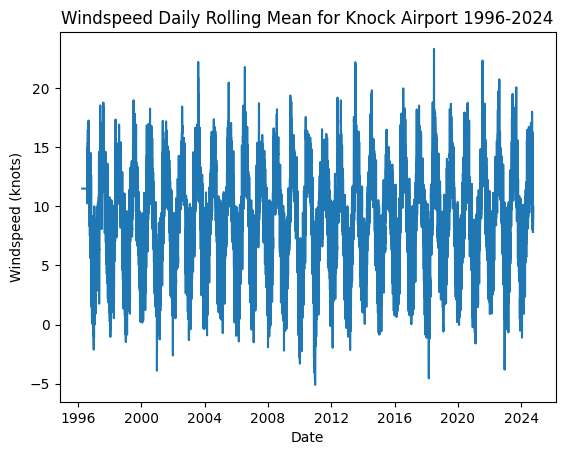

In [72]:
ax = sns.lineplot(
    weather_df["temp"].rolling("24h").mean()
    )
ax.set_ylabel("Windspeed (knots)")
ax.set_xlabel("Date")
ax.set_title("Windspeed Daily Rolling Mean for Knock Airport 1996-2024")

Text(0.5, 1.0, 'Max Windspeed at Knock Airport by Day, 1996-2024')

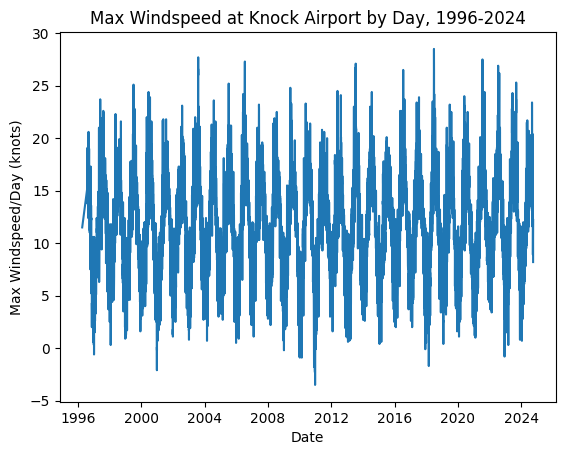

In [73]:
#Plot the max windspeed observed each day
ax = sns.lineplot(
    (weather_df["temp"].T.resample("24h").max())
)
ax.set_ylabel("Max Windspeed/Day (knots)")
ax.set_xlabel("Date")
ax.set_title("Max Windspeed at Knock Airport by Day, 1996-2024")

Text(0.5, 1.0, 'Monthly Mean of Max Windspeed at Knock Airport by Day, 1996-2024')

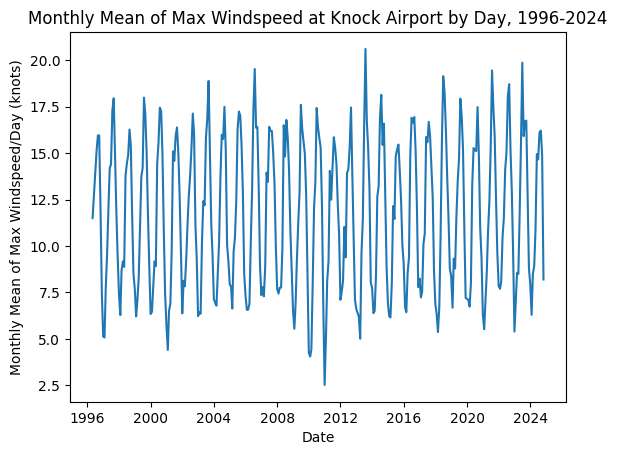

In [74]:
#Plot the monthly mean of the daily max windspeeds:
daily_max = weather_df["temp"].T.resample("24h").max()

ax = sns.lineplot(
    daily_max.T.resample("ME").mean()
)
ax.set_ylabel("Monthly Mean of Max Windspeed/Day (knots)")
ax.set_xlabel("Date")
ax.set_title("Monthly Mean of Max Windspeed at Knock Airport by Day, 1996-2024")